In [35]:
#import lib
#Project Overview
#This project uses Naive Bayes to perform sentiment analysis on Amazon product reviews.
#The goal is to classify reviews as 'good', 'bad', or 'neutral' based on their content.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path="/content/amazon_product_reviews_dataset.csv"

In [4]:
df=pd.read_csv(path)

/tmp/ipython-input-735132776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, order=['good', 'bad', 'worst'], palette='Set2')


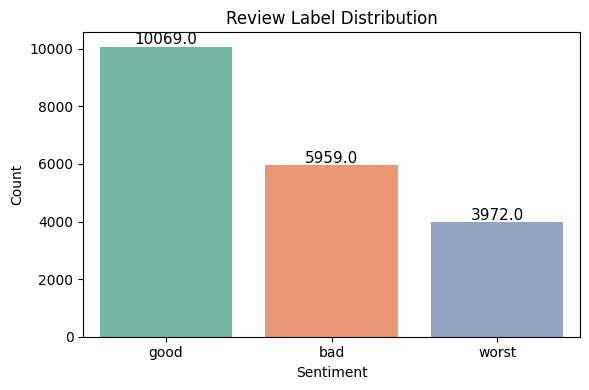

In [5]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='label', data=df, order=['good', 'bad', 'worst'], palette='Set2')
plt.title("Review Label Distribution")

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [6]:
df.head(3)

,review,label
0,The quality is really good and it performs as ...,good
1,Worst ever,worst
2,Could be better. Had some issues with performa...,bad


In [7]:
df['label'].value_counts()

,count
label,
good,10069
bad,5959
worst,3972


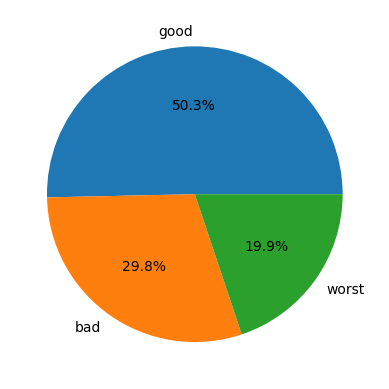

In [8]:
plt.pie(df['label'].value_counts(),labels=df['label'].value_counts().index,autopct="%1.1f%%")
plt.show()

In [9]:
x=df["label"]
y=df["review"]

In [10]:
x

,label
0,good
1,worst
2,bad
3,bad
4,good
...,...
19995,good
19996,worst
19997,worst
19998,bad


In [11]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#Project flow:
#1) Convert text into lower case
#2) Remove all punctuations
#3) Tokenize text
#4) Remove stopwords
#5) Stemming

In [15]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [16]:
stop_words=set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
stemmer=PorterStemmer()

In [18]:
def cleanup_text(text):
  text=text.lower() #to convert text to lower case
  text=text.translate(str.maketrans("","",string.punctuation)) #to remove punctuations
  word=text.split() #to tokenize the text
  word=[stemmer.stem(word) for word in word if word not in stop_words] #for stemming
  print("text")
  return ' '.join(word)

In [19]:
cleanup_text("Hello this is an apple")

text


'hello appl'

In [20]:
x[0]

'good'

In [21]:
x=x.apply(cleanup_text)

Streaming output truncated to the last 5000 lines.
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text
text

In [22]:
x.sample()

,label
7490,good


In [23]:
cleanup_text(x[0])

text


'good'

In [24]:
# x and y

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF=TfidfVectorizer()

In [26]:
x=TFIDF.fit_transform(x)
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20000 stored elements and shape (20000, 3)>

In [27]:
x=x.toarray()

In [28]:
x.shape

(20000, 3)

In [29]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(x,y)

MultinomialNB()

In [30]:
MNB.score(x,y)

0.0829

In [31]:
MNB.predict(TFIDF.transform(["This is a good product"]))

array(['The quality is really good and it performs as advertised.'],
      dtype='<U276')

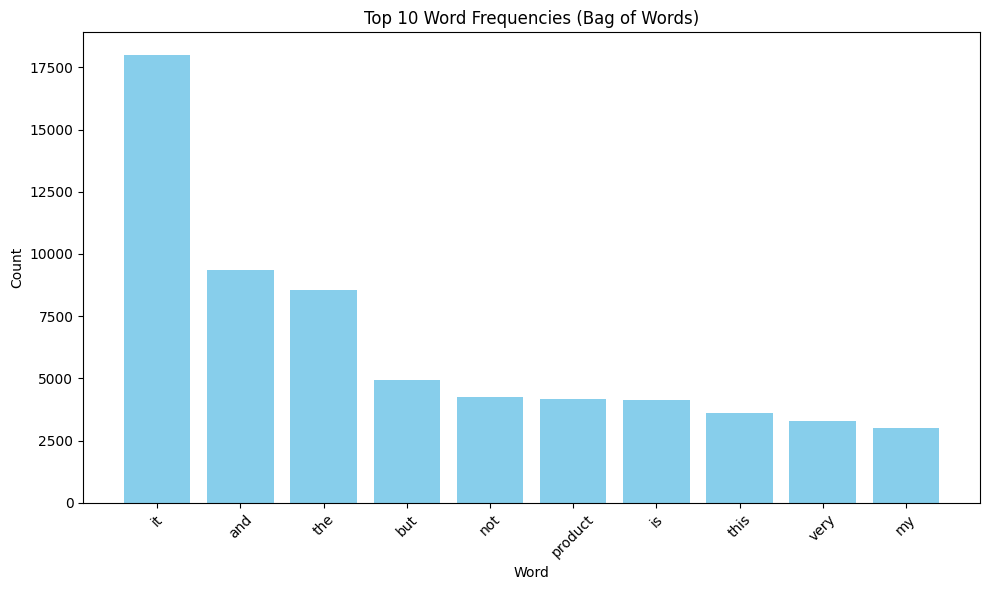

In [32]:
#top 10 most frequent words from the given dataset
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Vectorize review text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

#DataFrame
word_freq = pd.DataFrame({'word': words, 'count': word_counts})
word_freq = word_freq.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(word_freq['word'], word_freq['count'], color='skyblue')
plt.title("Top 10 Word Frequencies (Bag of Words)")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()


In [33]:
#importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from joblib import dump

#sample data
reviews = ["I love this product", "This is bad", "Absolutely terrible", "Very good", "I hate it", "Not good"]
labels = ["Good", "Bad", "Bad", "Good", "Bad", "Bad"]

#vectorize the data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)

#Train the model
model = MultinomialNB()
model.fit(X, labels)

#Save the model and vectorizer
dump(model, 'sentiment_model.joblib')
dump(vectorizer, 'vectorizer.joblib')



['vectorizer.joblib']

In [34]:
from google.colab import files
files.download('sentiment_model.joblib')
files.download('vectorizer.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>